In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from vocalseg.examples import mouse
from vocalseg.utils import butter_bandpass_filter, spectrogram, int16tofloat32, plot_spec

In [17]:
# load data
rate, data = mouse()
# filter data
data = butter_bandpass_filter(int16tofloat32(data), 30000, 120000, rate)

In [18]:
data = data[rate*5:rate*10]

In [19]:
figsize = (30,3)

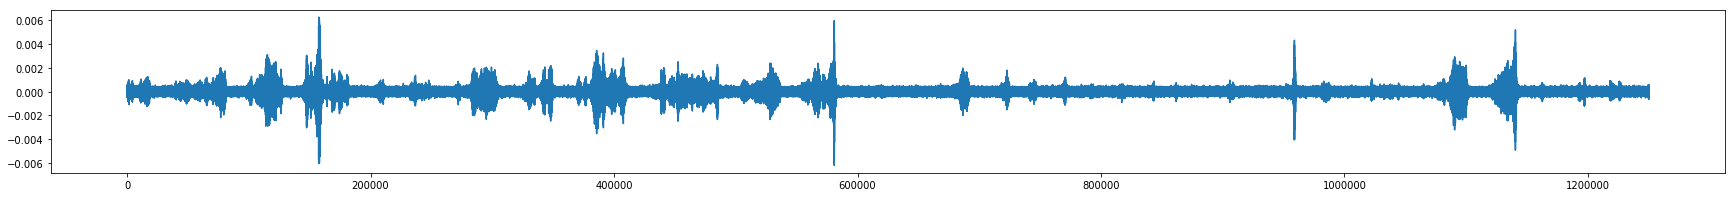

In [20]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(data)

### Generate spectrogram

In [59]:
### parameters
n_fft=4096
hop_length_ms=1
win_length_ms=4
ref_level_db=20
pre=0.97
min_level_db=-60
silence_threshold = 0.01
min_silence_for_spec=0.1
max_vocal_for_spec=1.0,
min_syllable_length_s = 0.01
spectral_range = [40000, 100000]
mask_thresh_std = 1.0
neighborhood_thresh=0.5
max_element_len_ms=2000
neighborhood_time_ms=10
neighborhood_freq_hz=2000

In [60]:
spec = spectrogram(
    data,
    rate,
    n_fft=n_fft,
    hop_length_ms=hop_length_ms,
    win_length_ms=win_length_ms,
    ref_level_db=ref_level_db,
    pre=pre,
    min_level_db=min_level_db,
)
np.shape(spec)

(2049, 5001)

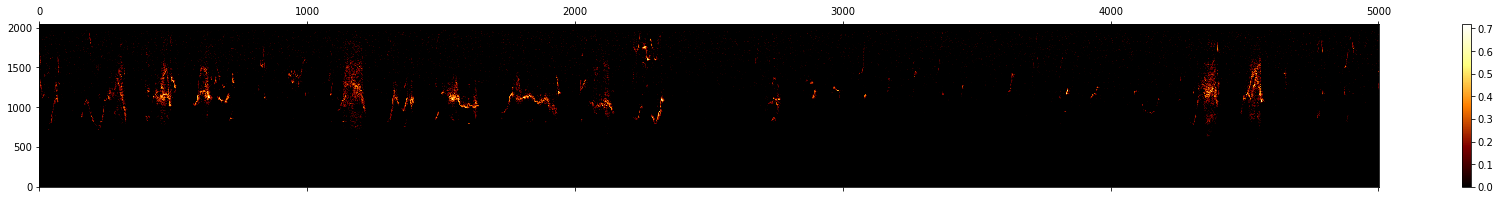

In [61]:
fig, ax = plt.subplots(figsize=figsize)
plot_spec(spec, fig, ax);

### segment vocalization using continuity segmenation

In [62]:
from vocalseg.continuity_filtering import continuity_segmentation

In [111]:
### parameters
n_fft=4096 # FFT window size
hop_length_ms=1
win_length_ms=4
ref_level_db=20
pre=0.97
min_level_db=-80
silence_threshold = 0.05
min_silence_for_spec=0.1
max_vocal_for_spec=1.0,
min_syllable_length_s = 0.01
spectral_range = [40000, 100000]
mask_thresh_std = 1.0
neighborhood_thresh=0.5
max_element_len_ms=2000
neighborhood_time_ms=5
neighborhood_freq_hz=2000
temporal_neighbor_merge_distance_ms= 0
overlapping_element_merge_thresh= 0.5
min_element_size_ms_hz = [5, 1000]

Exception ignored in: <generator object tqdm_notebook.__iter__ at 0x7febb0639d58>
Traceback (most recent call last):
  File "/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/_tqdm_notebook.py", line 226, in __iter__
    self.sp(bar_style='danger')
AttributeError: 'tqdm_notebook' object has no attribute 'sp'


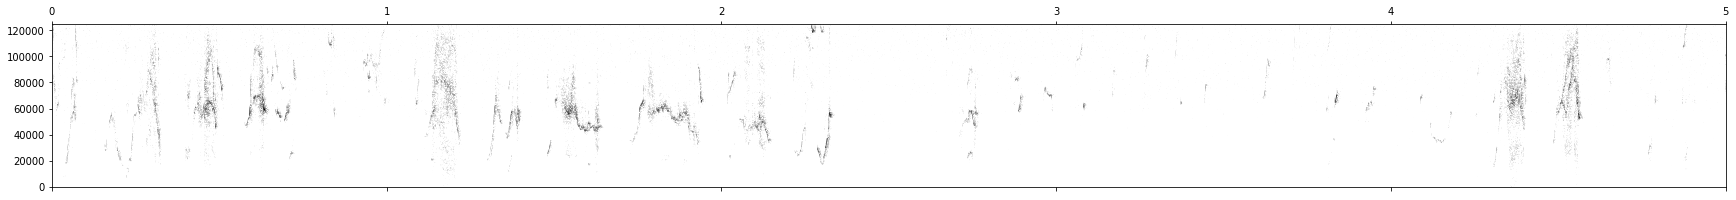

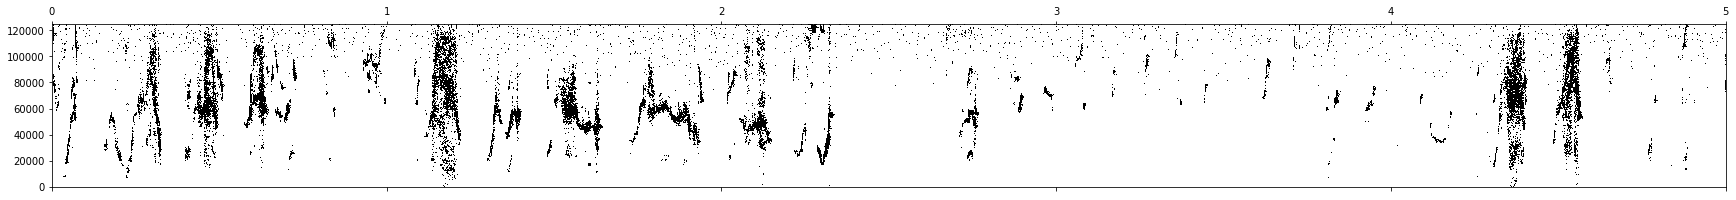

(32, 5)


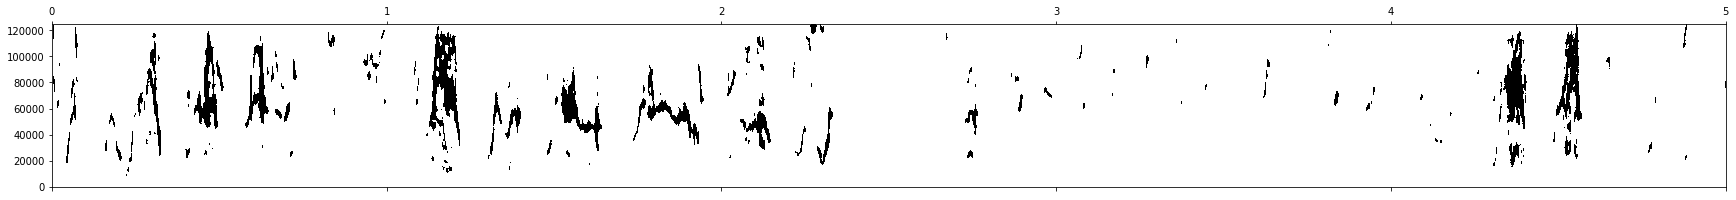

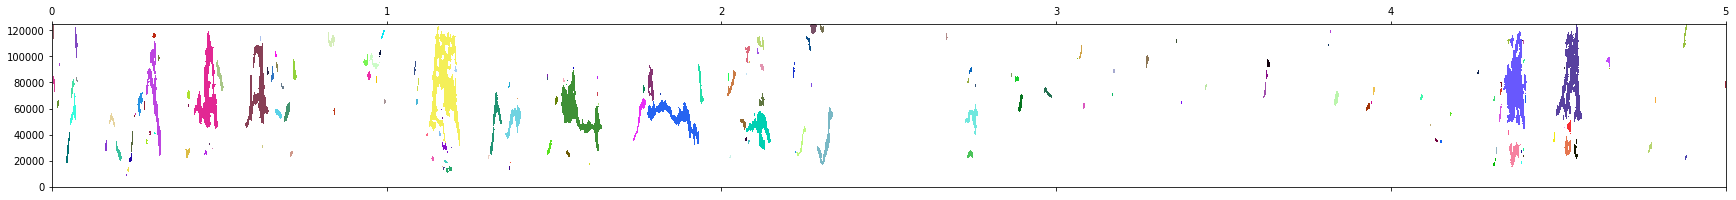

unique elements: 235


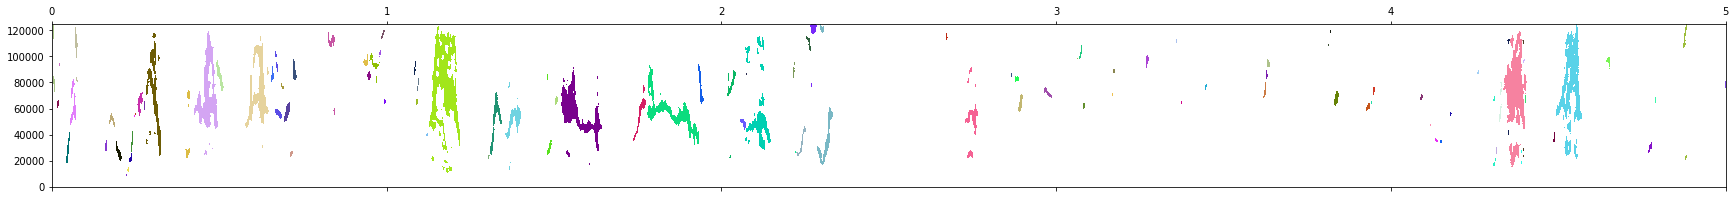

unique elements: 118
82


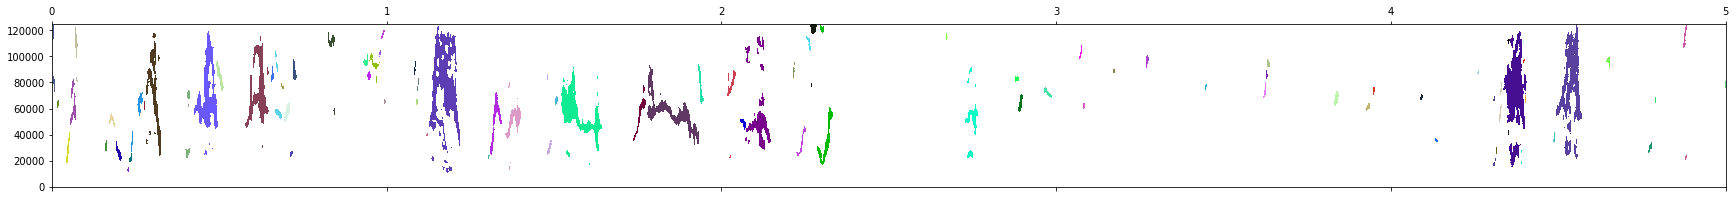

unique elements: 88
-60


In [115]:
results = continuity_segmentation(
    data,
    rate,
    n_fft=n_fft,
    hop_length_ms=hop_length_ms,
    win_length_ms=win_length_ms,
    ref_level_db=ref_level_db,
    pre=pre,
    min_level_db=min_level_db,
    verbose=True,
    spectral_range = spectral_range,
    mask_thresh_std = mask_thresh_std,
    figsize=figsize,
    neighborhood_thresh=neighborhood_thresh,
    max_element_len_ms = max_element_len_ms,
    neighborhood_time_ms=neighborhood_time_ms,
    neighborhood_freq_hz=neighborhood_freq_hz,
    temporal_neighbor_merge_distance_ms= 0, #10,
    overlapping_element_merge_thresh= 0.5,
    min_element_size_ms_hz = [5, 1000]
)
print(results['min_level_db'])